In [17]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
import utils

In [2]:
data = pd.read_csv('data/Country-data.csv')
df = data.drop(['country'],axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Analysis

## Correlation

<AxesSubplot:>

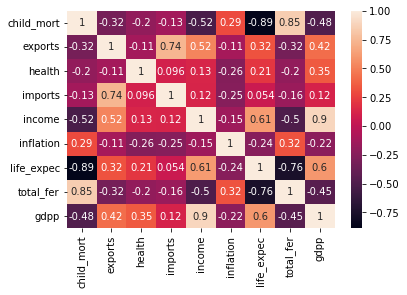

In [3]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

# Clustering

## Scale data

In [4]:
scaling=MinMaxScaler()
scaled=scaling.fit_transform(df)
scaled_df=pd.DataFrame(scaled, columns=df.columns)

# princt scaled dataset
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## K-means

### Elbow method to determine the number of clusters

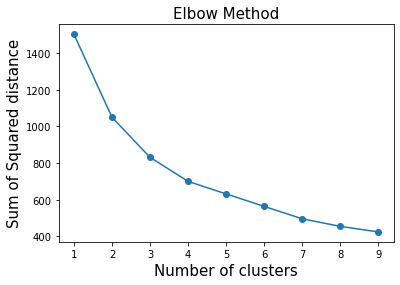

In [5]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(scaled_df)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

### Train K-means with k=3

In [6]:
kmeans = KMeans(n_clusters = 3,random_state = 7)
kmeans.fit(scaled_df)
pd.Series(kmeans.labels_).value_counts()

0    84
2    47
1    36
dtype: int64

In [20]:
utils.internalValidation(scaled_df, kmeans.labels_)

{'_silhouette_score': 0.28329575683463126,
 '_davies_bouldin_score': 1.2769056099698288}

### Prediction

In [8]:
cluster_labels = kmeans.fit_predict(scaled_df)
preds = kmeans.labels_
df['kmeans_clusters'] = preds
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Hierarchical Clustering

### Plot dendogram

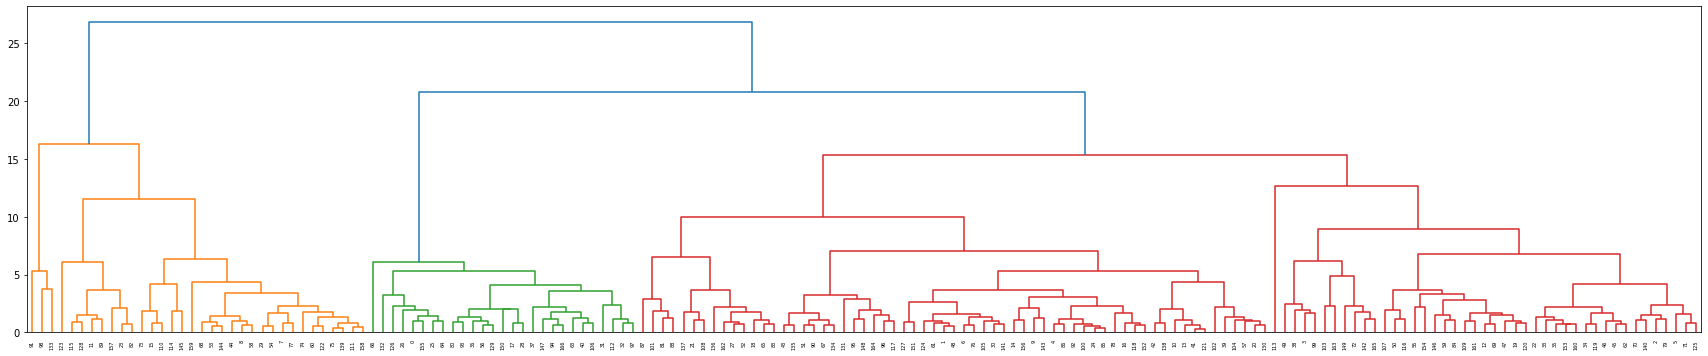

In [9]:
plt.figure(figsize=(30, 6))
dend=hcluster.dendrogram(hcluster.linkage(scaled_df,method='ward'))

### Train Hierarchical with k=3

In [19]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_
utils.internalValidation(scaled_df, hcluster_label)

{'_silhouette_score': 0.24563001303300652,
 '_davies_bouldin_score': 1.299788958694555}

In [11]:
hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters,hcluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


## Spectral clustering

### Eigengap heuristic

Optimal number of clusters [ 9 19 21 24  3]


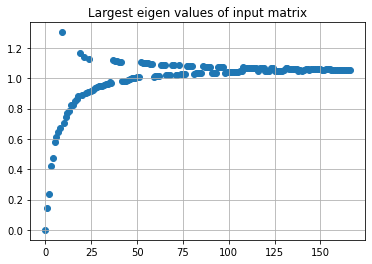

In [14]:
from spectral_clustering_utils import getAffinityMatrix, eigenDecomposition
affinity_matrix = getAffinityMatrix(scaled_df, k = 10)
k, _,  _ = eigenDecomposition(affinity_matrix)
print(f'Optimal number of clusters {k}')

Train cluster with n_cluster = 3

In [16]:
from sklearn.cluster import SpectralClustering, AffinityPropagation
spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')
labels_nn = spectral_model_nn.fit_predict(scaled_df)

In [18]:
utils.internalValidation(scaled_df, labels_nn)

{'_silhouette_score': 0.2839903775240613,
 '_davies_bouldin_score': 1.1831388666127818}

# Visualization of results